In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
# 1. Carregar os dados
df_pib = pd.read_csv("pib_estados_2022.csv")
df_censo = pd.read_csv("censo_2022_pop_negra.csv")
df_homicidios = pd.read_csv("homicidios-negros.csv", sep=";")

In [3]:
# 2. Filtrar apenas o ano de 2022
df_2022 = df_homicidios[df_homicidios["período"] == 2022]

In [5]:
# 3. Unir dados (pelo nome do estado)
df_merge = df_2022.merge(df_censo, on="nome")
df_merge = df_merge.merge(df_pib, left_on="nome", right_on="nome", how="inner")

In [6]:
# 4. Calcular PIB per capita
df_merge["pib_reais"] = df_merge["pib_mil_reais"] * 1000
df_merge["pib_per_capita"] = df_merge["pib_reais"] / df_merge["pop_total"]

In [7]:
# 5. Calcular taxa de homicídios de negros por 100 mil
df_merge["taxa_homicidios_negros"] = (df_merge["valor"] / df_merge["pop_negra"]) * 100000

In [8]:
# 6. Correlação estatística
corr, p_value = pearsonr(df_merge["pib_per_capita"], df_merge["taxa_homicidios_negros"])
print(f"Correlação de Pearson: {corr:.3f} (p-valor={p_value:.3f})")

Correlação de Pearson: -0.618 (p-valor=0.001)


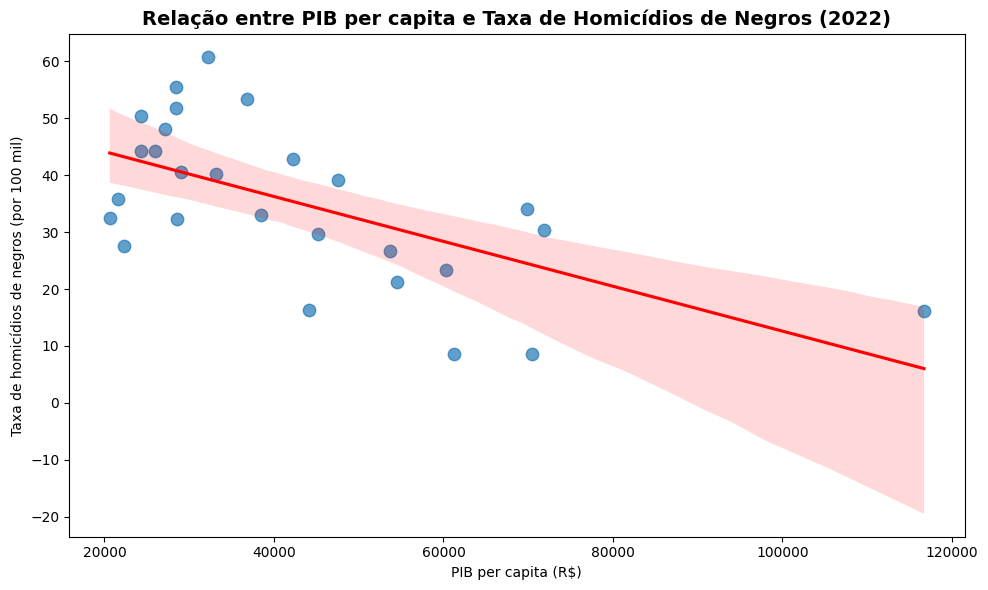

   nome  pib_per_capita  taxa_homicidios_negros
10   DF   116700.581143               16.082736
22   RJ    71846.745479               30.365443
2    SP    70485.155131                8.656315
12   MT    69841.900658               34.073742
24   SC    61268.315655                8.629948
8    MS    60357.713221               23.287424
15   RS    54547.083446               21.290490
20   PR    53704.176198               26.695073
4    ES    47616.774552               39.213456
5    GO    45147.909833               29.744439
19   MG    44144.668237               16.339886
0    RO    42243.339852               42.850449
16   TO    38511.770077               33.021445
7    AM    36822.488661               53.454308
14   RR    33131.408953               40.126762
23   AP    32182.228770               60.816389
17   PA    29081.057929               40.543882
26   AC    28524.682597               32.368453
11   BA    28472.468442               55.543452
21   RN    28406.508678               51

In [9]:
# 7. Gráfico de dispersão com linha de regressão
plt.figure(figsize=(10,6))
sns.regplot(
    data=df_merge,
    x="pib_per_capita",
    y="taxa_homicidios_negros",
    scatter_kws={"s": 80, "alpha":0.7},
    line_kws={"color":"red"}
)

plt.title("Relação entre PIB per capita e Taxa de Homicídios de Negros (2022)", fontsize=14, fontweight="bold")
plt.xlabel("PIB per capita (R$)")
plt.ylabel("Taxa de homicídios de negros (por 100 mil)")
plt.tight_layout()
plt.show()

# 8. Mostrar tabela resumida
print(df_merge[["nome", "pib_per_capita", "taxa_homicidios_negros"]].sort_values("pib_per_capita", ascending=False))
